In [39]:
import numpy as np
np.random.seed(5)

from keras.layers import Input, Dense, SimpleRNN
from keras.models import Model
from keras.optimizers import SGD
from keras.utils import to_categorical

from keras import backend as K
import tensorflow as tf
from tensorflow import keras

import pathlib

In [40]:
path=str(pathlib.Path().resolve())+"/"

In [41]:
# 1. LECTURA DEL SET DE DATOS
# ===========================================================
nombres = open(path + 'nombres_dinosaurios.txt','r').read()
nombres = nombres.lower()

# Crear diccionario (listado de caracteres que no se repiten)
alfabeto = list(set(nombres))
tam_datos, tam_alfabeto = len(nombres), len(alfabeto)
print("En total hay %d caracteres, y el diccionario tiene un tamaño de %d caracteres." % (tam_datos, tam_alfabeto))

# Conversión de caracteres a índices y viceversa
car_a_ind = { car:ind for ind,car in enumerate(sorted(alfabeto))}
ind_a_car = { ind:car for ind,car in enumerate(sorted(alfabeto))}
print(car_a_ind)
print(ind_a_car)

En total hay 19909 caracteres, y el diccionario tiene un tamaño de 27 caracteres.
{'\n': 0, 'a': 1, 'b': 2, 'c': 3, 'd': 4, 'e': 5, 'f': 6, 'g': 7, 'h': 8, 'i': 9, 'j': 10, 'k': 11, 'l': 12, 'm': 13, 'n': 14, 'o': 15, 'p': 16, 'q': 17, 'r': 18, 's': 19, 't': 20, 'u': 21, 'v': 22, 'w': 23, 'x': 24, 'y': 25, 'z': 26}
{0: '\n', 1: 'a', 2: 'b', 3: 'c', 4: 'd', 5: 'e', 6: 'f', 7: 'g', 8: 'h', 9: 'i', 10: 'j', 11: 'k', 12: 'l', 13: 'm', 14: 'n', 15: 'o', 16: 'p', 17: 'q', 18: 'r', 19: 's', 20: 't', 21: 'u', 22: 'v', 23: 'w', 24: 'x', 25: 'y', 26: 'z'}


In [42]:
nneuronas = 128
# Return_sequences = True ya que no sabemos cual es la longitud que nos va dar, una letra, dos letras, tres letras
# por eso no podemos darle lote y tendremos que ir de Batch en Batcj
model = keras.models.Sequential([
                                  keras.layers.SimpleRNN(nneuronas, return_sequences=True, input_shape=(None, tam_alfabeto)),
                                  keras.layers.SimpleRNN(nneuronas, return_sequences=True),
                                  keras.layers.Dense(tam_alfabeto, activation="softmax")
                                 ])
model.compile(loss="categorical_crossentropy",optimizer="adam")

In [43]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_4 (SimpleRNN)    (None, None, 128)         19968     
                                                                 
 simple_rnn_5 (SimpleRNN)    (None, None, 128)         32896     
                                                                 
 dense_2 (Dense)             (None, None, 27)          3483      
                                                                 
Total params: 56347 (220.11 KB)
Trainable params: 56347 (220.11 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


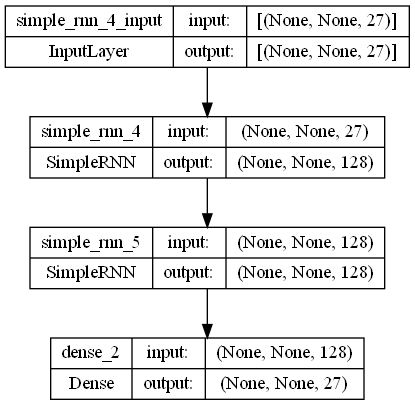

In [44]:
keras.utils.plot_model(model,"dinos.png",show_shapes=True)

In [45]:
with open(path + "nombres_dinosaurios.txt") as f:
      ejemplos = f.readlines()
ejemplos = [x.lower().strip() for x in ejemplos]

In [46]:
ejemplos

['aachenosaurus',
 'aardonyx',
 'abdallahsaurus',
 'abelisaurus',
 'abrictosaurus',
 'abrosaurus',
 'abydosaurus',
 'acanthopholis',
 'achelousaurus',
 'acheroraptor',
 'achillesaurus',
 'achillobator',
 'acristavus',
 'acrocanthosaurus',
 'acrotholus',
 'actiosaurus',
 'adamantisaurus',
 'adasaurus',
 'adelolophus',
 'adeopapposaurus',
 'aegyptosaurus',
 'aeolosaurus',
 'aepisaurus',
 'aepyornithomimus',
 'aerosteon',
 'aetonyxafromimus',
 'afrovenator',
 'agathaumas',
 'aggiosaurus',
 'agilisaurus',
 'agnosphitys',
 'agrosaurus',
 'agujaceratops',
 'agustinia',
 'ahshislepelta',
 'airakoraptor',
 'ajancingenia',
 'ajkaceratops',
 'alamosaurus',
 'alaskacephale',
 'albalophosaurus',
 'albertaceratops',
 'albertadromeus',
 'albertavenator',
 'albertonykus',
 'albertosaurus',
 'albinykus',
 'albisaurus',
 'alcovasaurus',
 'alectrosaurus',
 'aletopelta',
 'algoasaurus',
 'alioramus',
 'aliwalia',
 'allosaurus',
 'almas',
 'alnashetri',
 'alocodon',
 'altirhinus',
 'altispinax',
 'alvarez

In [64]:
def genera_train():
    rx = []
    ry = []
    # Recojo un random entre 0 y la longitud de ejemplos
    ejemplo = ejemplos[np.random.randint(0, len(ejemplos))]
    
    # Las X son un 0 y el OneHotEncoder de cada valor
    X = [None] + [car_a_ind[c] for c in ejemplo]

    # Las Y son las valores de X y los enters de las palabras
    Y = X[1:] + [car_a_ind["\n"]]

    onehot = to_categorical(X[1:], tam_alfabeto)
    X = np.zeros((len(X), tam_alfabeto))
    X[1:] = onehot.astype("float32")
    y = to_categorical(Y, tam_alfabeto).reshape(len(X), tam_alfabeto)
    rx.append(X)
    ry.append(y)
    return np.array(rx),np.array(ry)

In [65]:
niters = 10000
for j in range(niters):
  rx, ry = genera_train()
  historia = model.train_on_batch(rx, ry)
  if j%10 == 0: print(f"Iter: {j} loss:{historia}")

Iter: 0 loss:1.3799691200256348
Iter: 10 loss:2.0303139686584473
Iter: 20 loss:2.006148338317871
Iter: 30 loss:1.4701498746871948
Iter: 40 loss:1.421934962272644
Iter: 50 loss:1.918860912322998
Iter: 60 loss:1.8558260202407837
Iter: 70 loss:1.17171311378479
Iter: 80 loss:1.811063528060913
Iter: 90 loss:2.4531610012054443
Iter: 100 loss:1.7128576040267944
Iter: 110 loss:1.8060635328292847
Iter: 120 loss:1.157918095588684
Iter: 130 loss:2.16217303276062
Iter: 140 loss:1.9721553325653076
Iter: 150 loss:1.2989169359207153
Iter: 160 loss:2.4528536796569824
Iter: 170 loss:1.1139230728149414
Iter: 180 loss:1.1186507940292358
Iter: 190 loss:1.1942074298858643
Iter: 200 loss:3.3164288997650146
Iter: 210 loss:2.0894148349761963
Iter: 220 loss:2.2055230140686035
Iter: 230 loss:1.8180625438690186
Iter: 240 loss:1.1810493469238281
Iter: 250 loss:1.7177423238754272
Iter: 260 loss:1.5033320188522339
Iter: 270 loss:2.5247955322265625
Iter: 280 loss:1.8863030672073364
Iter: 290 loss:1.7505561113357544


In [66]:
def genera_nombre():
  x = np.zeros((1,1,tam_alfabeto))
  nombre = ""
  car = -1

  cont = 0
  # Generamos palabras mientras que sea diferente a salto de línea y no se repita 30
  while car != "\n" and cont != 30:

    # Esto devuelve un SoftMax
    pred = model.predict(x, verbose=0)

    # Valor último predicho
    ultimo = pred[0:, -1:, :]

    """MUY HABITUAL"""
    # Coge el resultado, lo aplana y selecciona un valor entre 0 y el tamaño
    ix = np.random.choice(list(range(tam_alfabeto)), p=ultimo.ravel())
    
    # Recogemos un caracter y lo añadimos al nombre
    car = ind_a_car[ix]
    nombre += car

    # Esto lo que hace es convertir l valor IX elegido a categorical mentiendo el Shape de X
    x1 = to_categorical(ix,tam_alfabeto)
    x = x.reshape(-1,27)
    x1 = x1.reshape(-1,27)
    x = np.append(x,x1)
    x = x.reshape(1,-1,27)
    cont += 1

  print(nombre)

In [69]:
for i in range(20):
    genera_nombre()

nathanosaurus

crertosaurus

martntinl

overavophis

pataxanosaurus

ranagaia

protaliapa

pavinosaurus

kuncoveratops

junsaseuseus

lapperocvenator

magulodon

stesaanlong

bahaanodgia

shuangrugosaurus

prounynosaurus

sunmangostriospondylux

macropocol

suchosaurus

pantoceratops

